In [3]:
# ************************************************
# ************************************************
# Ali - Group 25 - Exploratory Data Analysis script
#
# This script contains the exploratory data analysis
# as a preliminary to the subsequent Modelling.R
# script. This was also assisted by the following
# functions from the PBA lab3DataPreprocessing.R script:
# - N
# ************************************************
# ************************************************
# clear all environment variables

rm(list=ls())

# ************************************************
# CONSTANTS
# ************************************************

# datasets - these were split into train and test 
# by the original provider, and will be combined
TRAIN_FILENAME <- "train.csv"
TEST_FILENAME <- "test.csv"
TARGET_FIELD <- "satisfaction"

# ************************************************

In [6]:

# ************************************************
# main() :
# main entry point to execute analytics
#
# INPUT : None
#
# OUTPUT : None
#
# ************************************************
main<-function(){
  
  print("Inside main function")
  
  # read in data and combine
  data <- readData(TRAIN_FILENAME, TEST_FILENAME)
  
  # ************************************************
  # EDA
  # ************************************************
  print("Starting EDA")
  
  # descriptive summary of structure & statistics
  # pre-encoding of categoricals
  str(data)
  summary(data)
  NPREPROCESSING_prettyDataset(data)
  
  # check missing values
  missing_values_summary <- colSums(is.na(data))
  print(missing_values_summary)
  
  # check proportion of missing vals in each column
  missing_percentage <- colSums(is.na(
    data)) / nrow(data) * 100
  print(missing_percentage)
  
  # visualise missing values
  aggr_plot <- VIM::aggr(data, col=c('navyblue','red'), numbers=TRUE, 
                         sortVars=TRUE, 
                         labels=names(data), 
                         cex.axis=.7, 
                         gap=3, 
                         ylab=c("Histogram of missing data","Pattern"))
  print(aggr_plot)
  
  
  # deal with missing values
  
  # determine number of unique values of each field
  getUniqueValues(data)
  
  # determine field types
  fieldTypes<-getColumnTypes(data)
  
  # display descriptive statistics
  NPREPROCESSING_prettyDataset(data)
  
  # visualise discrete data
  fieldTypes1<-NPREPROCESSING_discreteNumeric(dataset=data,
                                               field_types=fieldTypes,
                                               cutoff=DISCRETE_BINS)
  print("Field types after discrete-binning:/n")
  print(fieldTypes1)
  
  results<-data.frame(field=names(data),initial=fieldTypes,types1=fieldTypes1)
  print(formattable::formattable(results))
  
  # VISUALISATIONS NOT WORKING BECAUSE DATASET TOO LARGE
  # ---------------------------------------------------
  # visualise distributions of data
  histPlots <-visualiseHist(data)
  print(histPlots)
  
  # importance of each field via randomforest
  
  
  # enhanced visualisation of distribution, correlation
  # and plot of pairs 
  #pairPlot <- ggpairs(data)
  #print(pairPlot)
  
  # heatmap of correlations
  correlationMatrix <- cor(data %>% select(where(is.numeric)), 
                           method = "pearson")
  corrplot(correlationMatrix, method = "color", type = "upper", 
           order = "hclust", tl.col = "black", tl.srt = 45)
  
  
  # ************************************************
  # PRE-PROCESSING & VISUALISATION
  # ************************************************
  
  # encode categoricals
  #data <- encodeCategoricals(data)
  
  # standardise/scale data
  
  # outlier analysis
  # naive
  #ordinals<-data[,which(fieldTypes1==TYPE_ORDINAL)]
  #ordinals<-NPREPROCESSING_outlier(ordinals=ordinals,confidence=OUTLIER_CONF)
  
  # LOF outlier removal compared to Random Forest
  
  
  
  # descriptive summary of structure & statistics
  # post-encoding of categoricals
  #str(data)
  #summary(data)
  
  # outlier removal
  
  # visualisation of outlier removal
  
  # if linear relationships, PCA & potentially MCA or 
  # CATPCA, 80%/85% Var. Exp.
  
  # compare with autoencoder
  
  # compare with t-SNE and UMAP
  
  # ************************************************
  # MODELLING, METRICS & VISUALISATIONS - DIFFERENT FILE
  # ************************************************
  
  # Deep VAE for clustering
  
  # HDBScan or Kmeans depending on data
  
  print("Leaving main")
  
}

[1] "Inside main function"
[1] "CSV data read. Records= 207808"
[1] "Starting EDA"
'data.frame':	207808 obs. of  25 variables:
 $ X                             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id                            : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                        : chr  "Male" "Male" "Female" "Female" ...
 $ CustomerType                  : chr  "Loyal Customer" "disloyal Customer" "Loyal Customer" "Loyal Customer" ...
 $ Age                           : int  13 25 26 25 61 26 47 52 41 20 ...
 $ TypeofTravel                  : chr  "Personal Travel" "Business travel" "Business travel" "Business travel" ...
 $ Class                         : chr  "Eco Plus" "Business" "Business" "Business" ...
 $ FlightDistance                : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflightwifiservice           : int  3 3 2 2 3 3 2 4 1 3 ...
 $ DepartureArrivaltimeconvenient: int  4 2 2 5 3 4 4 3 2 3 ...
 $ EaseofOnlineb

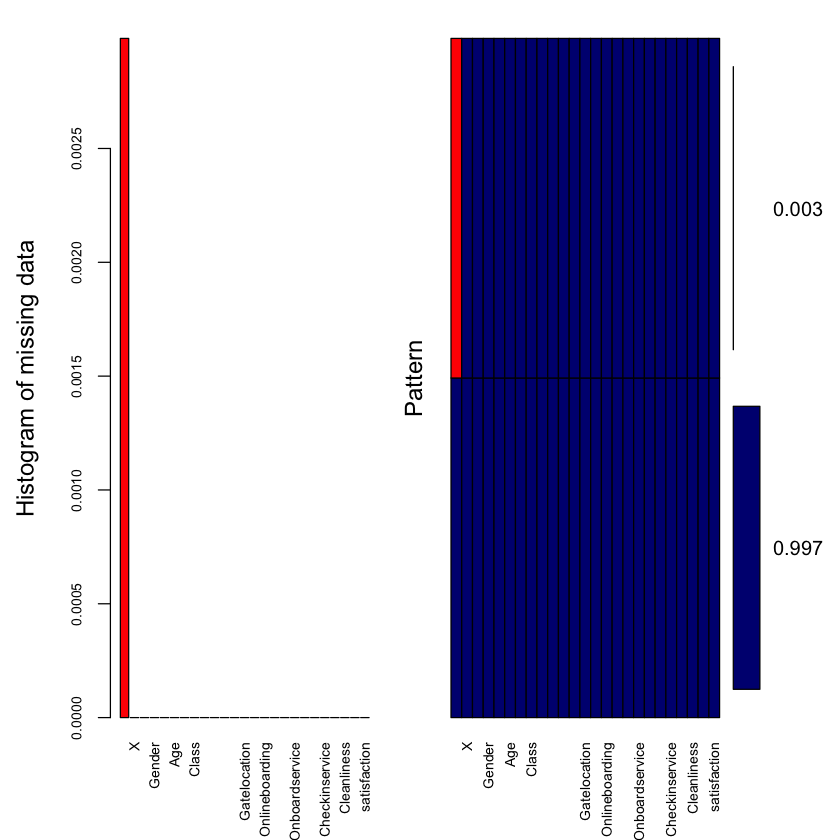

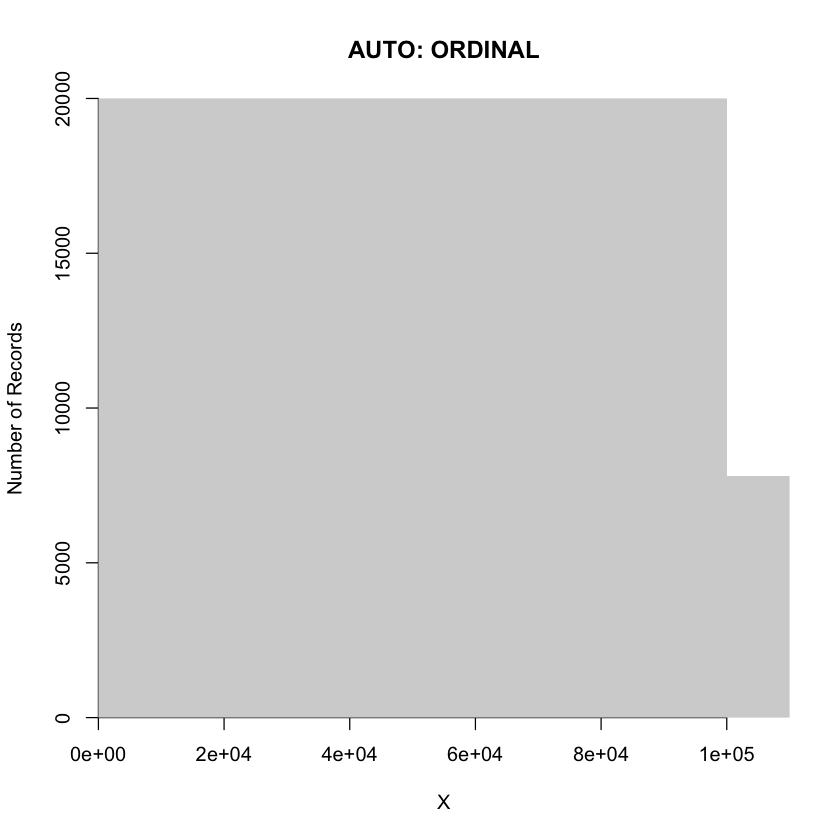

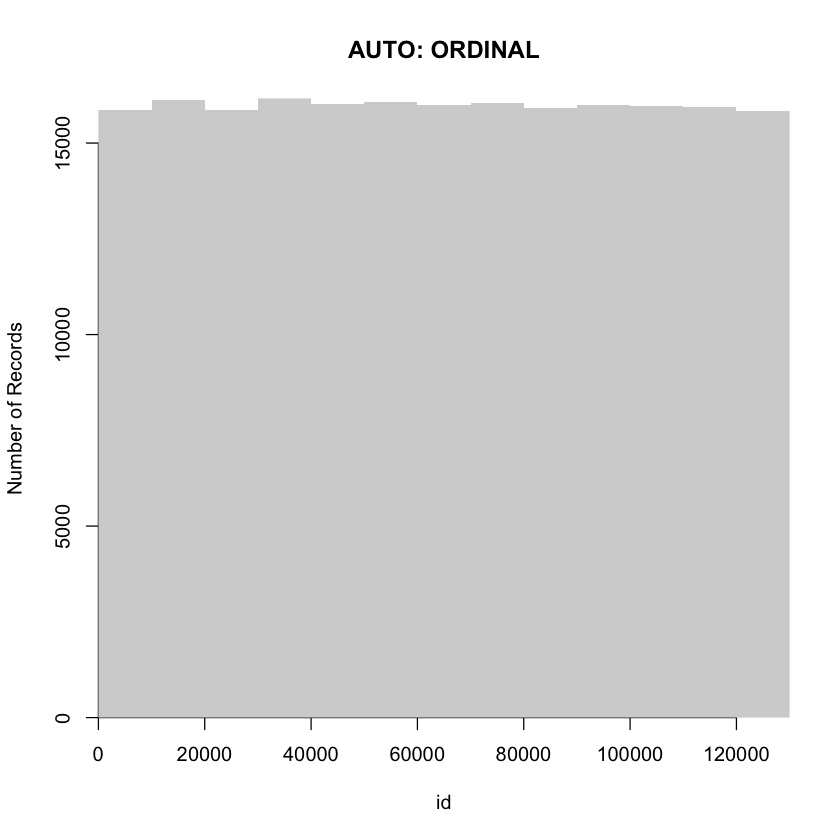

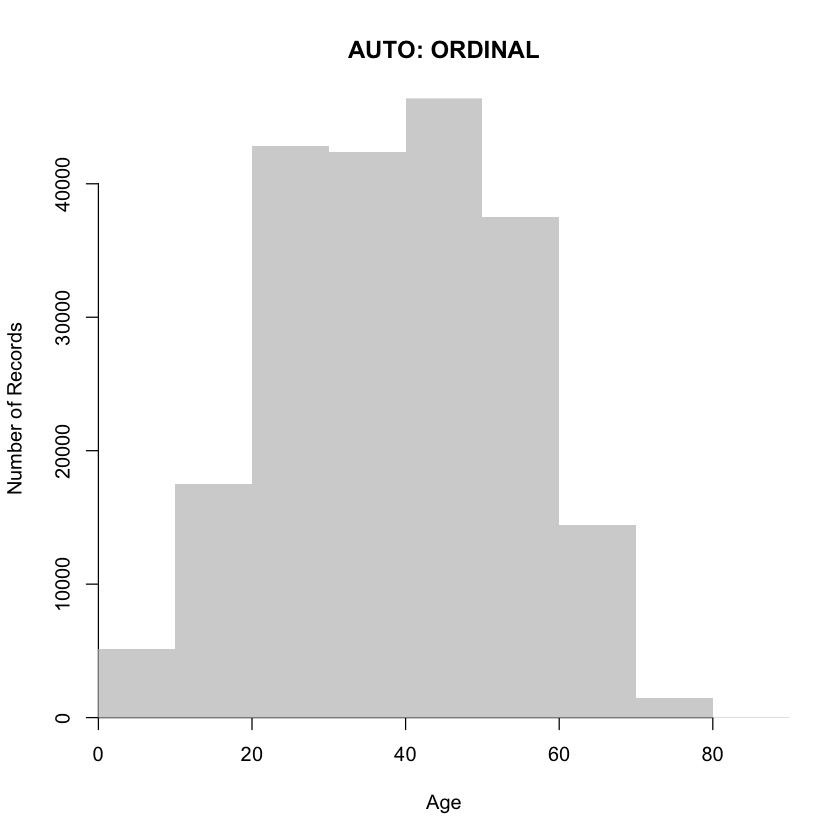

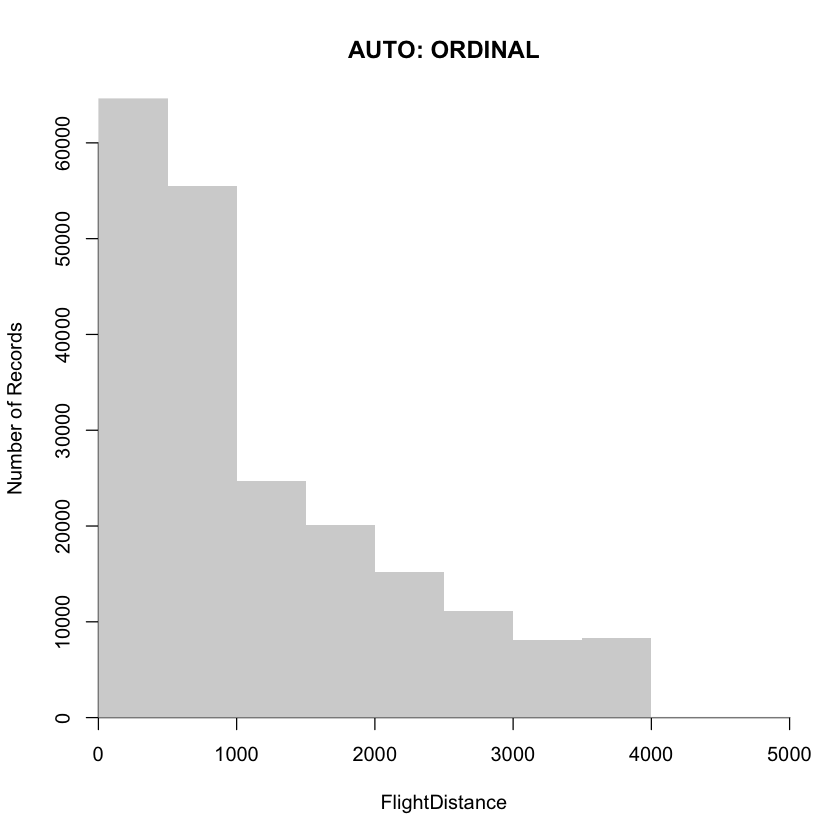

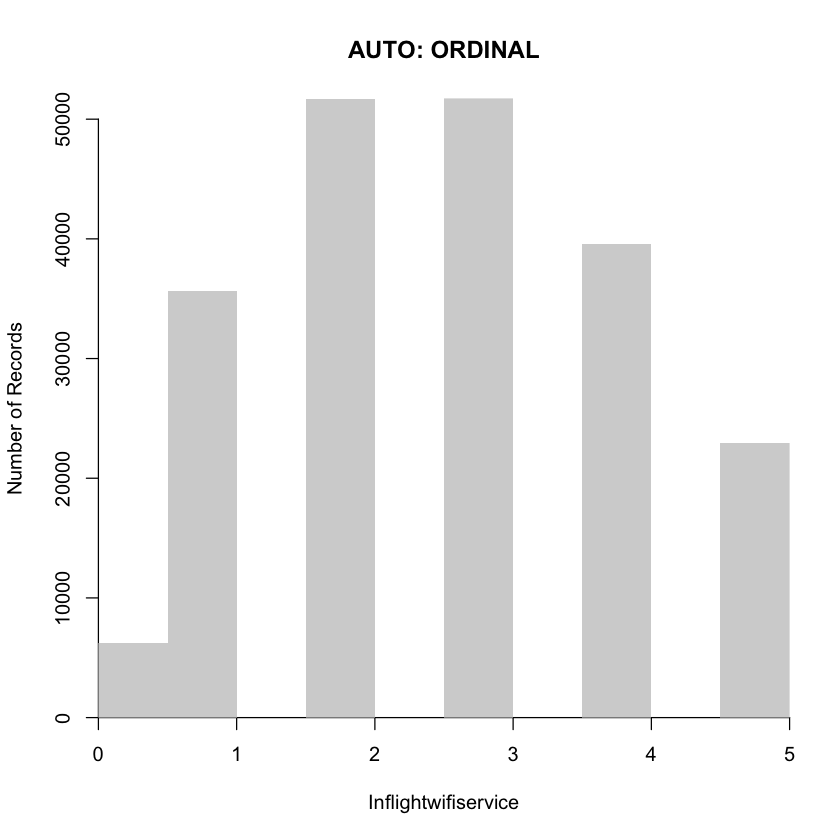

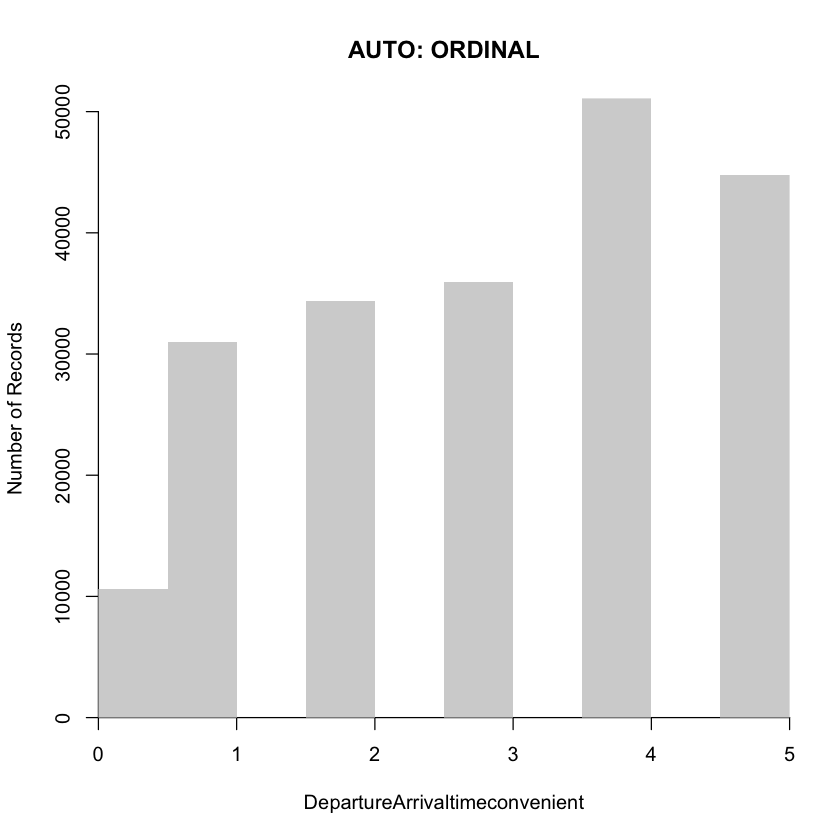

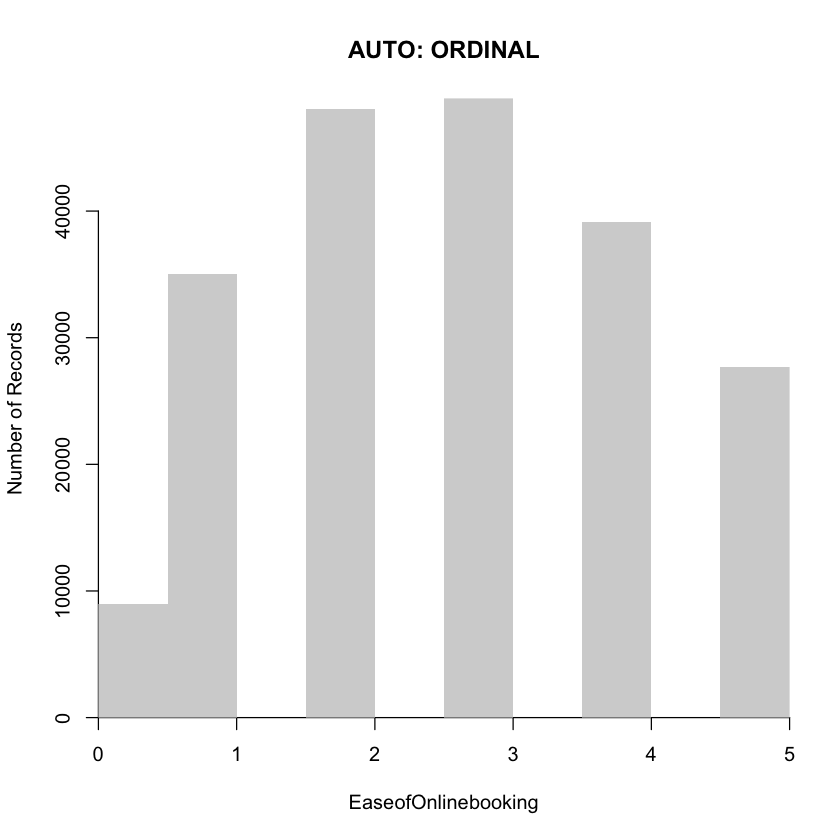

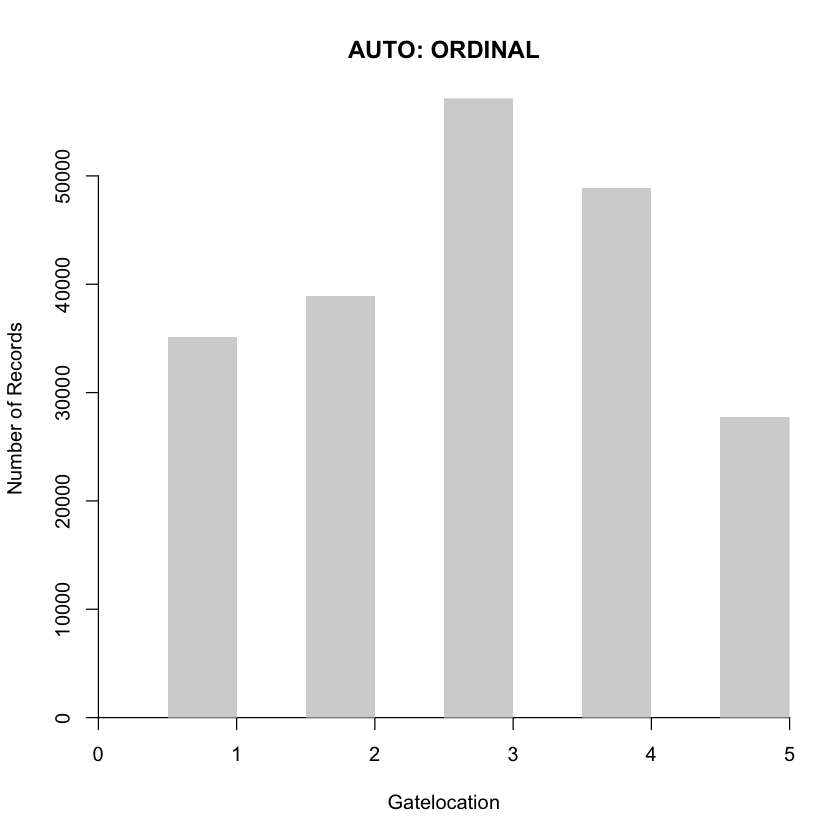

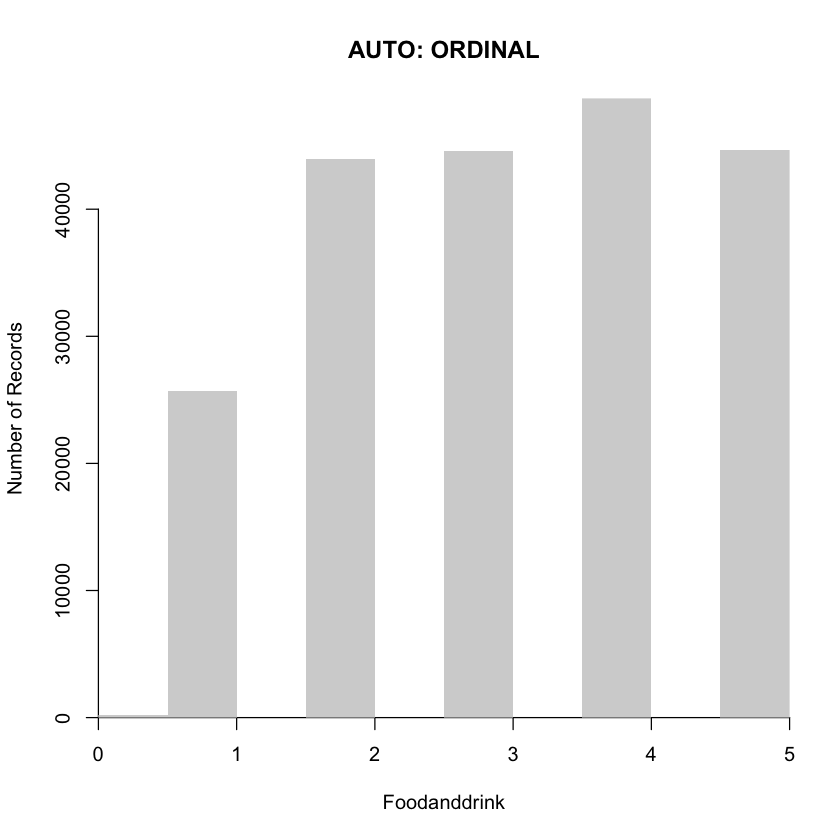

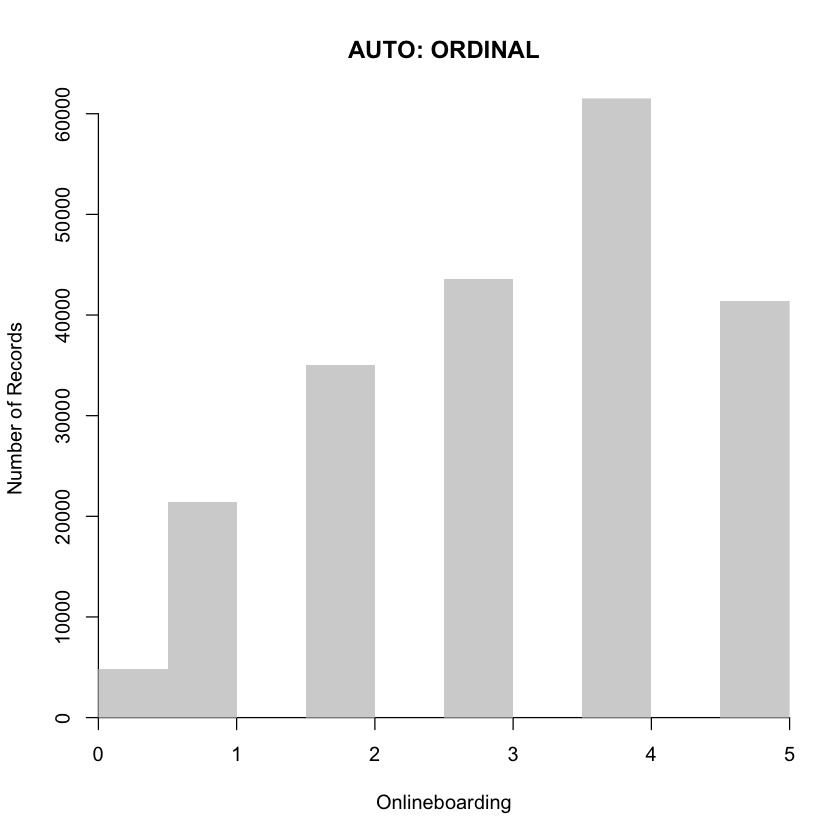

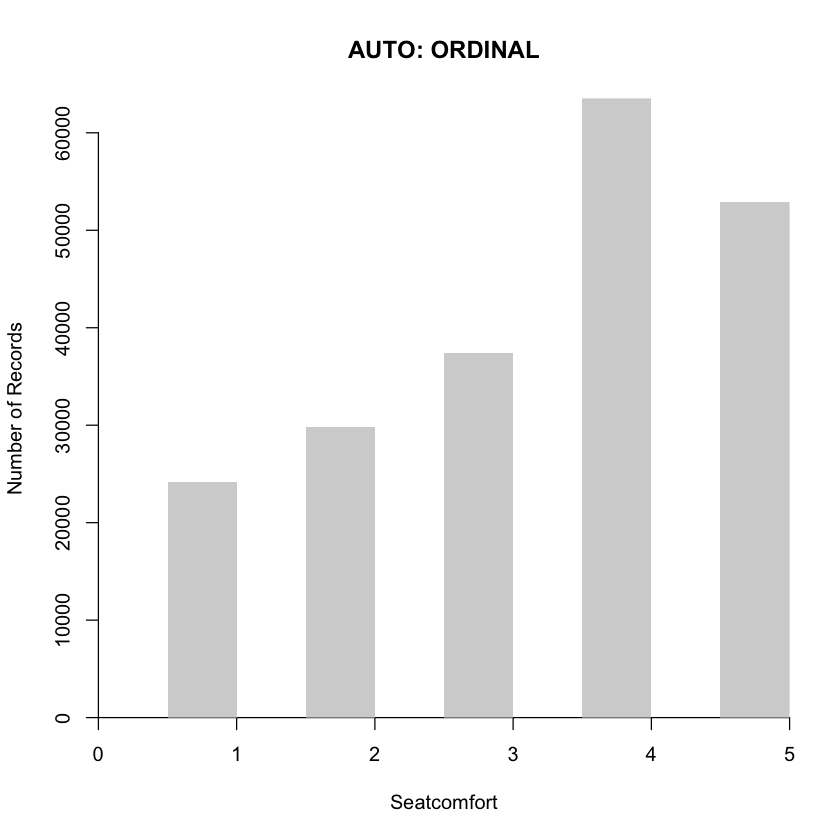

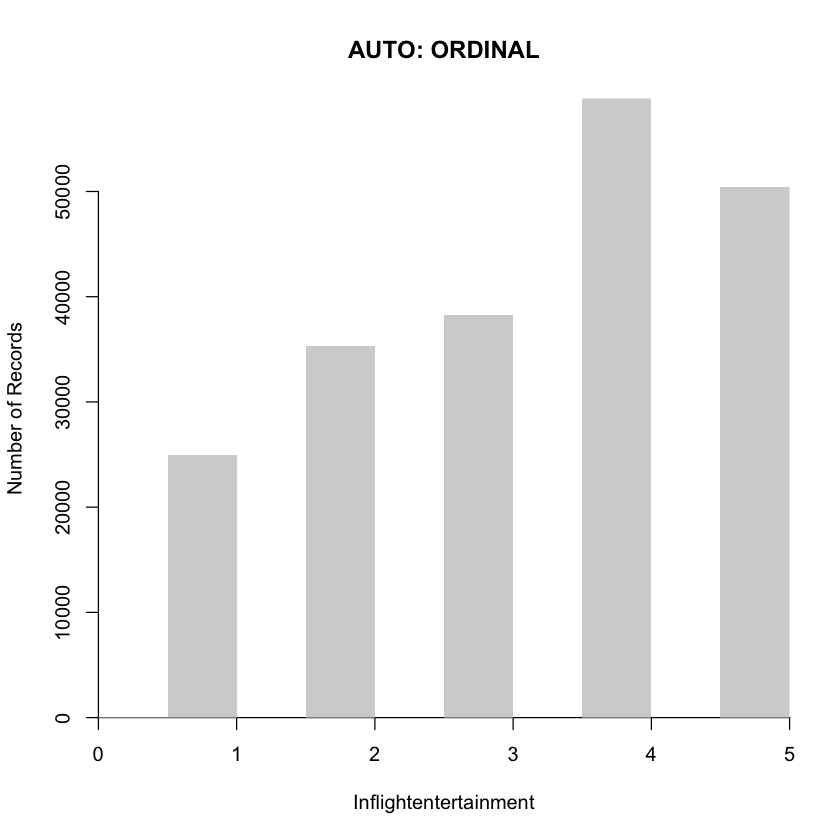

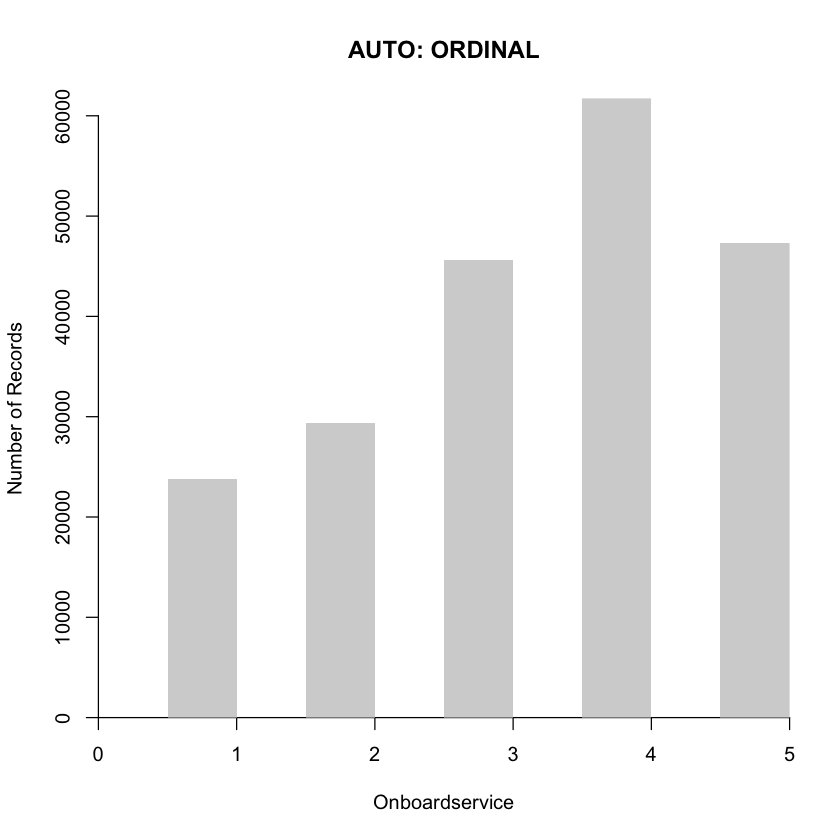

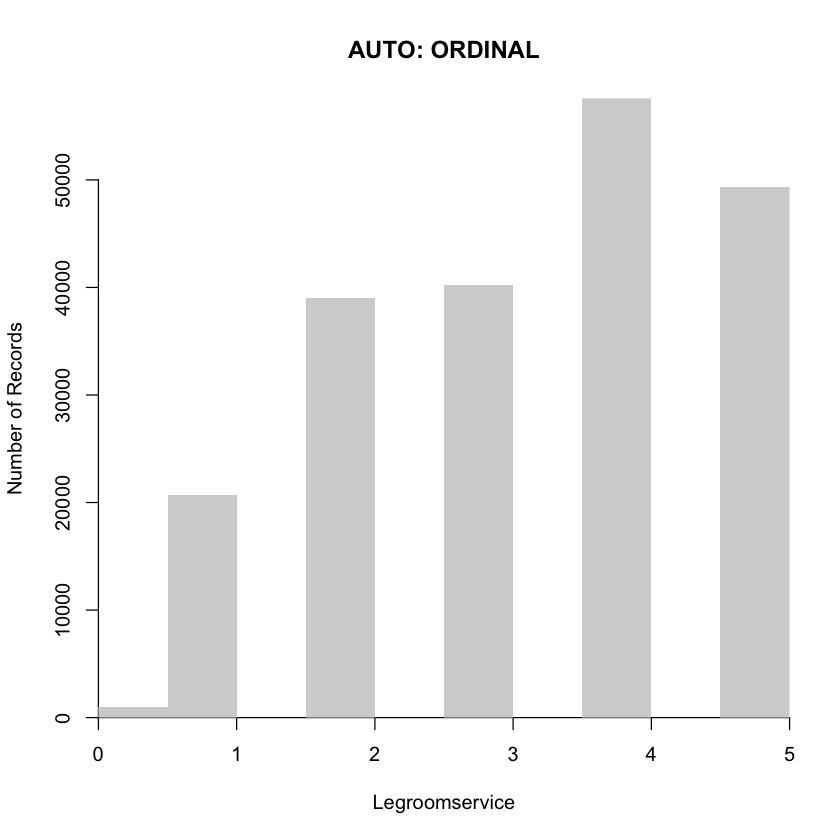

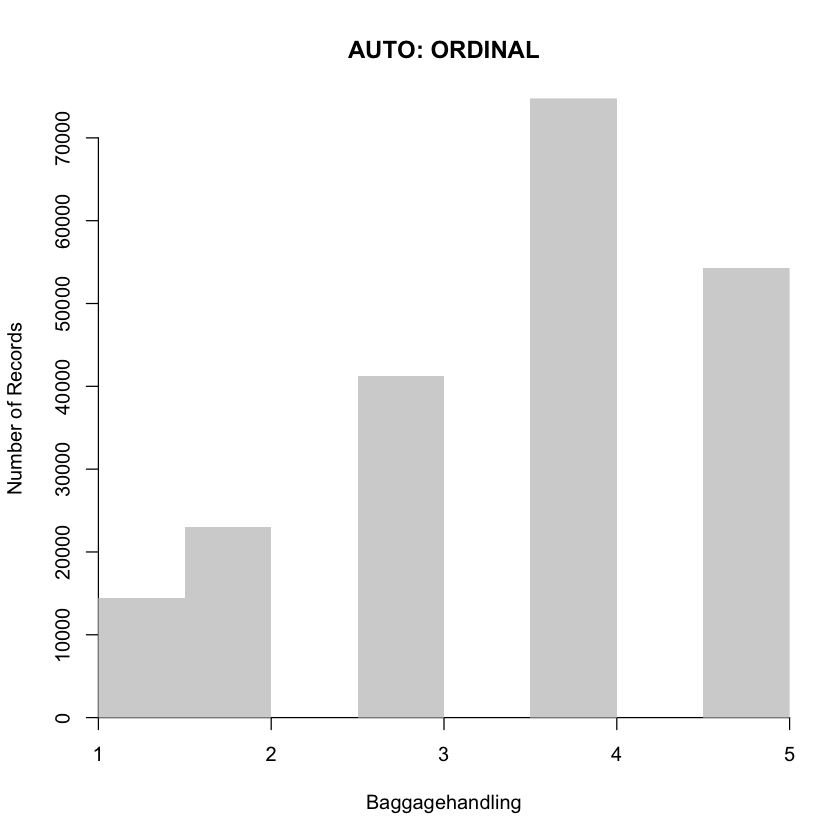

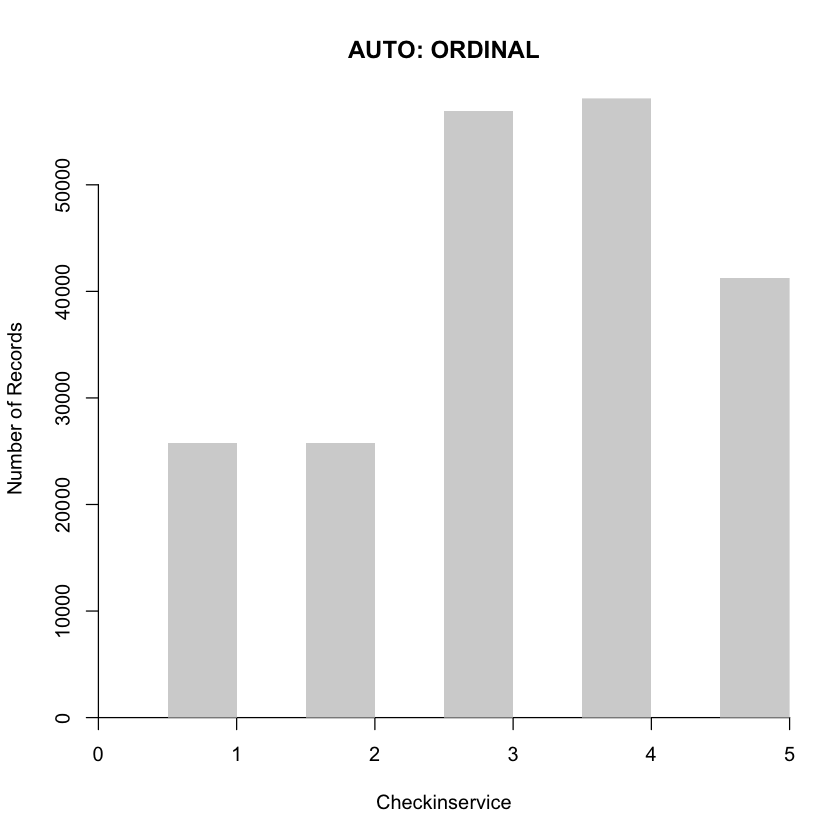

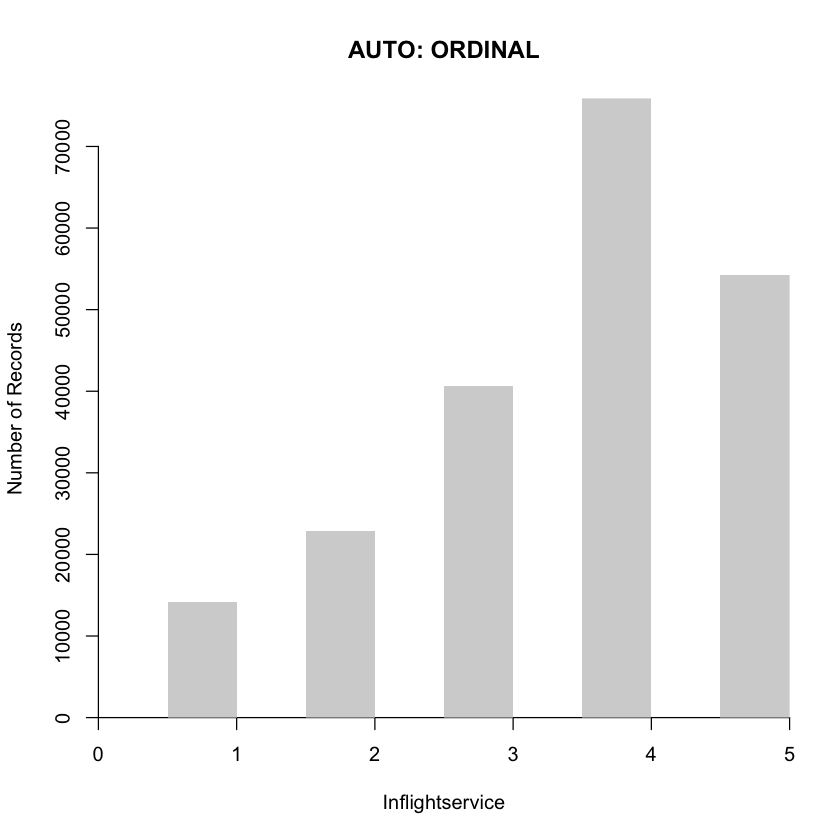

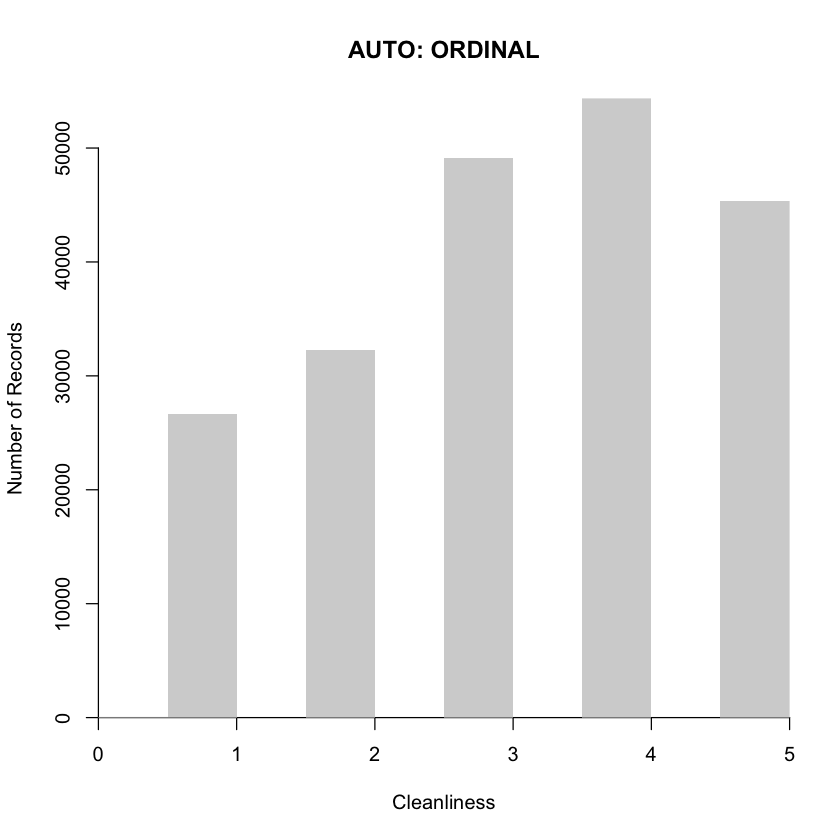

[1] "Field types after discrete-binning:/n"
$X
[1] "ORDINAL"

$id
[1] "ORDINAL"

$Gender
[1] "SYMBOLIC"

$CustomerType
[1] "SYMBOLIC"

$Age
[1] "ORDINAL"

$TypeofTravel
[1] "SYMBOLIC"

$Class
[1] "SYMBOLIC"

$FlightDistance
[1] "ORDINAL"

$Inflightwifiservice
[1] "ORDINAL"

$DepartureArrivaltimeconvenient
[1] "ORDINAL"

$EaseofOnlinebooking
[1] "ORDINAL"

$Gatelocation
[1] "ORDINAL"

$Foodanddrink
[1] "ORDINAL"

$Onlineboarding
[1] "ORDINAL"

$Seatcomfort
[1] "ORDINAL"

$Inflightentertainment
[1] "ORDINAL"

$Onboardservice
[1] "ORDINAL"

$Legroomservice
[1] "ORDINAL"

$Baggagehandling
[1] "ORDINAL"

$Checkinservice
[1] "ORDINAL"

$Inflightservice
[1] "ORDINAL"

$Cleanliness
[1] "ORDINAL"

$DepartureDelayinMinutes
[1] "DISCRETE"

$ArrivalDelayinMinutes
[1] "DISCRETE"

$satisfaction
[1] "SYMBOLIC"



Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning message in geom_bar(bins = 30, fill = "blue", color = "black"):
“Ignoring unknown parameters: `bins`”
Warning me

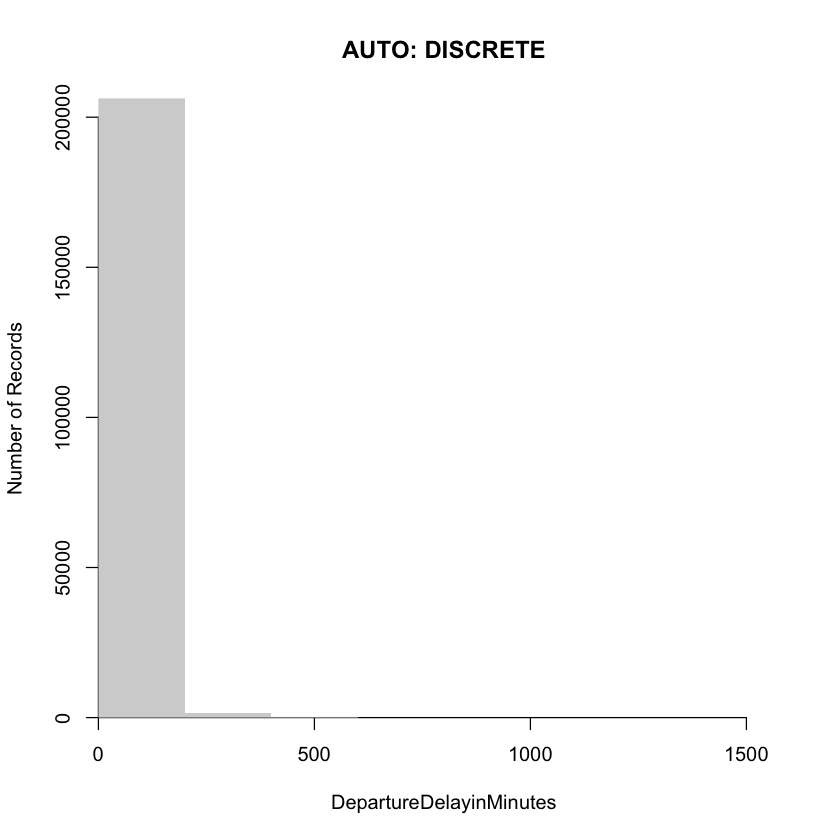

[[1]]


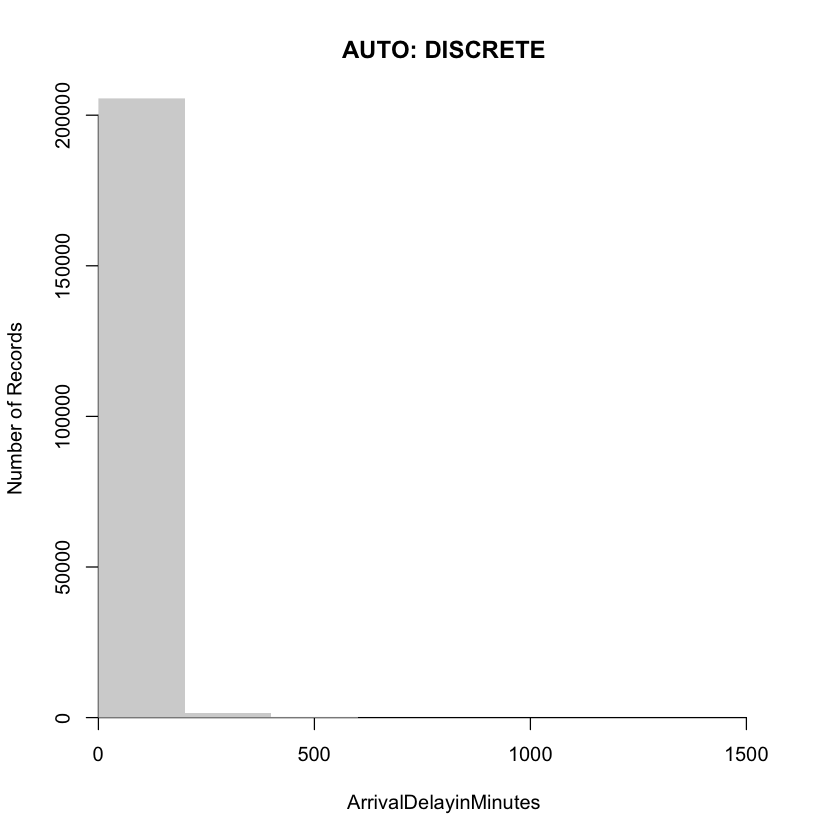


[[2]]


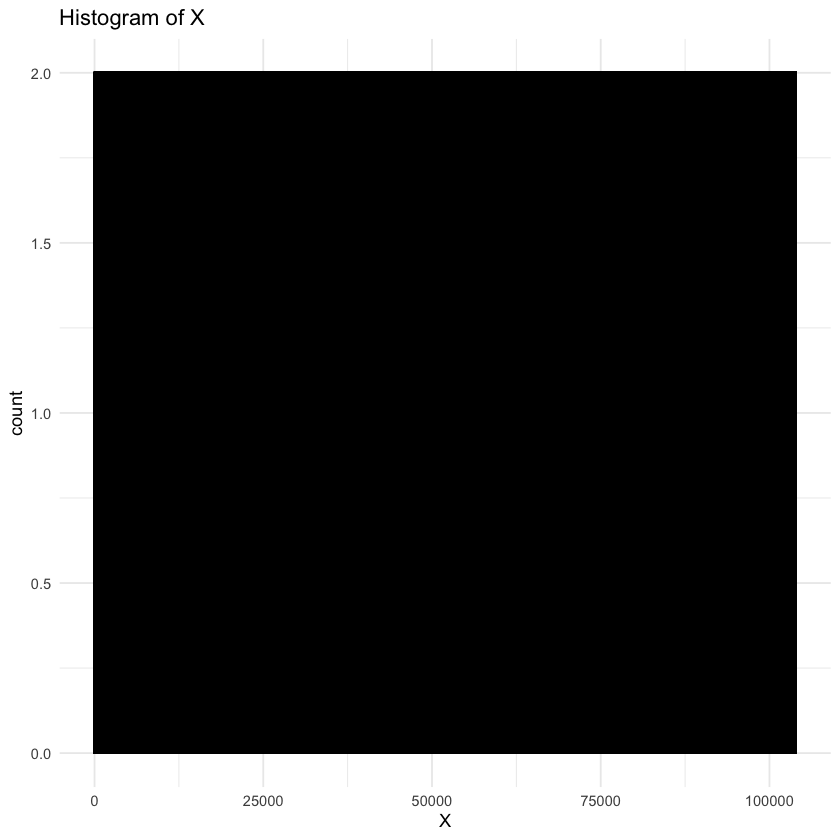


[[3]]


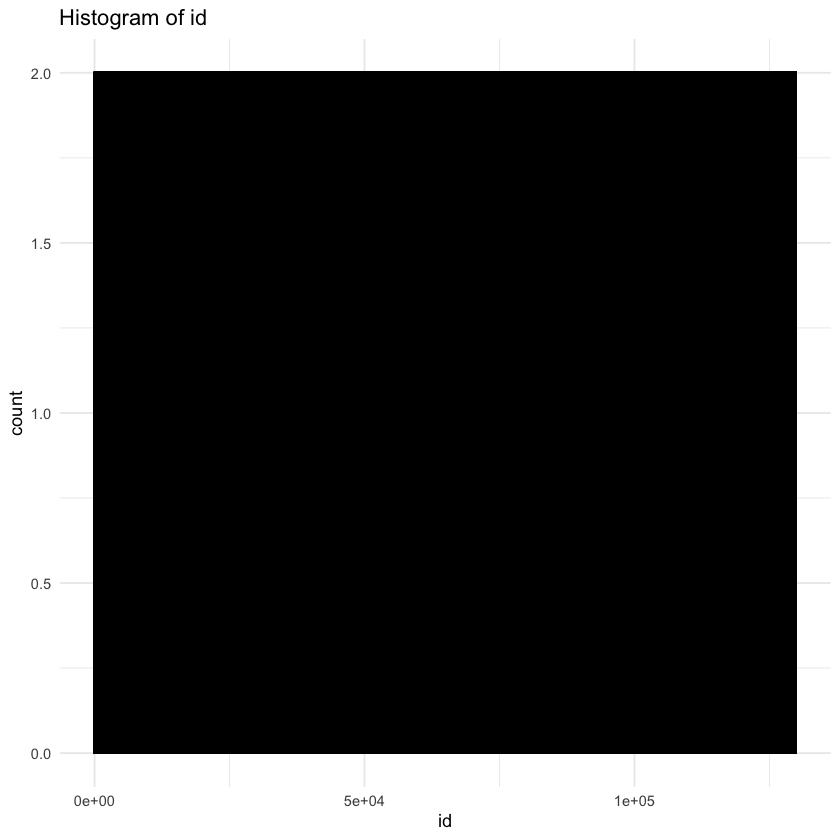


[[4]]


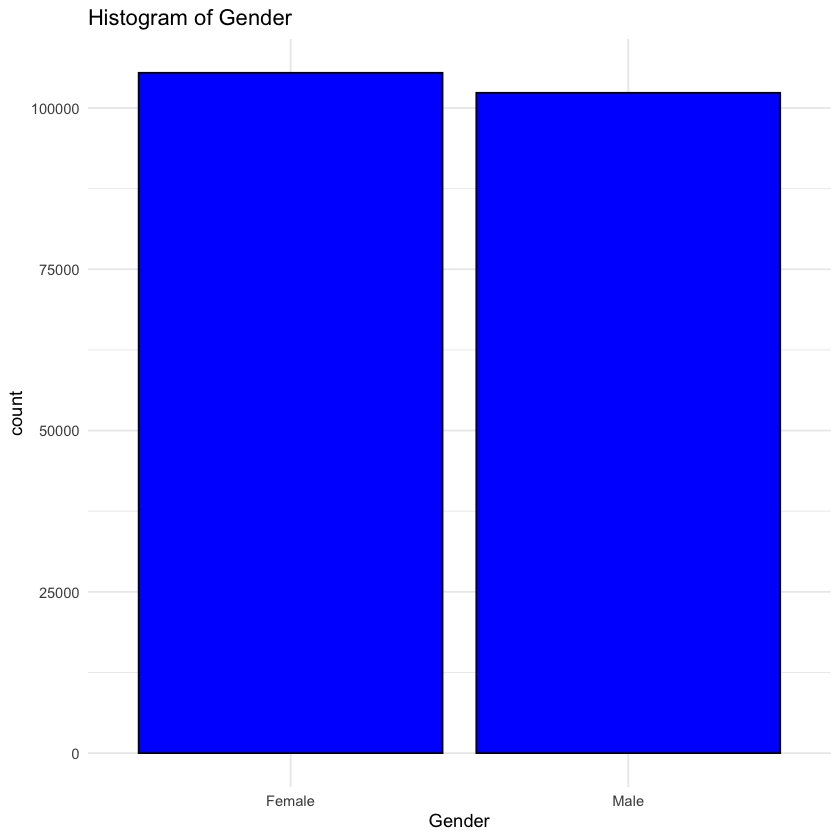


[[5]]


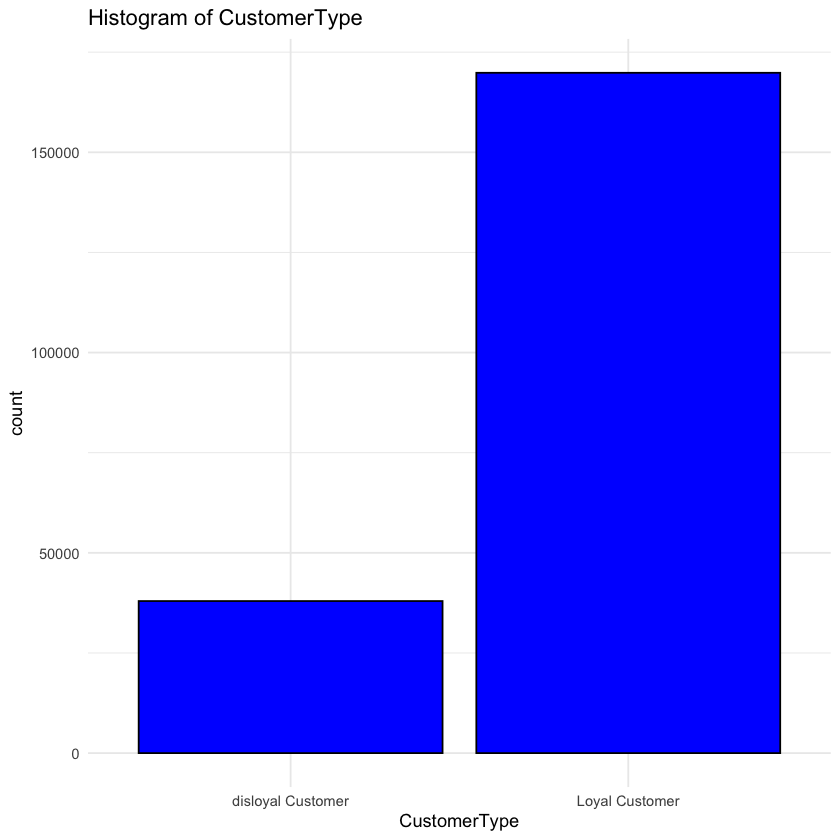


[[6]]


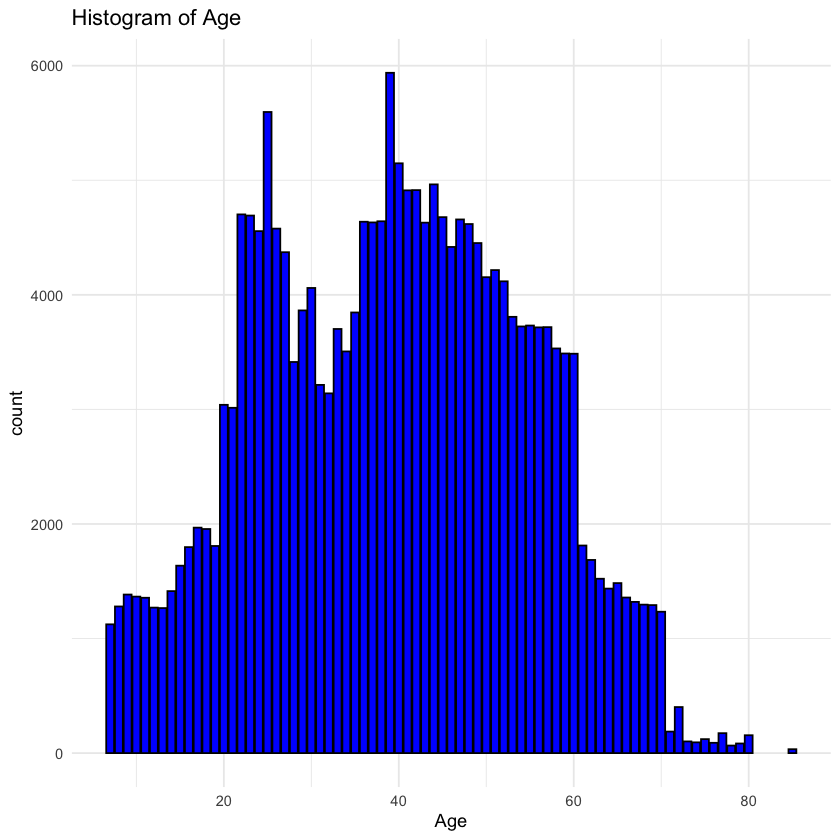


[[7]]


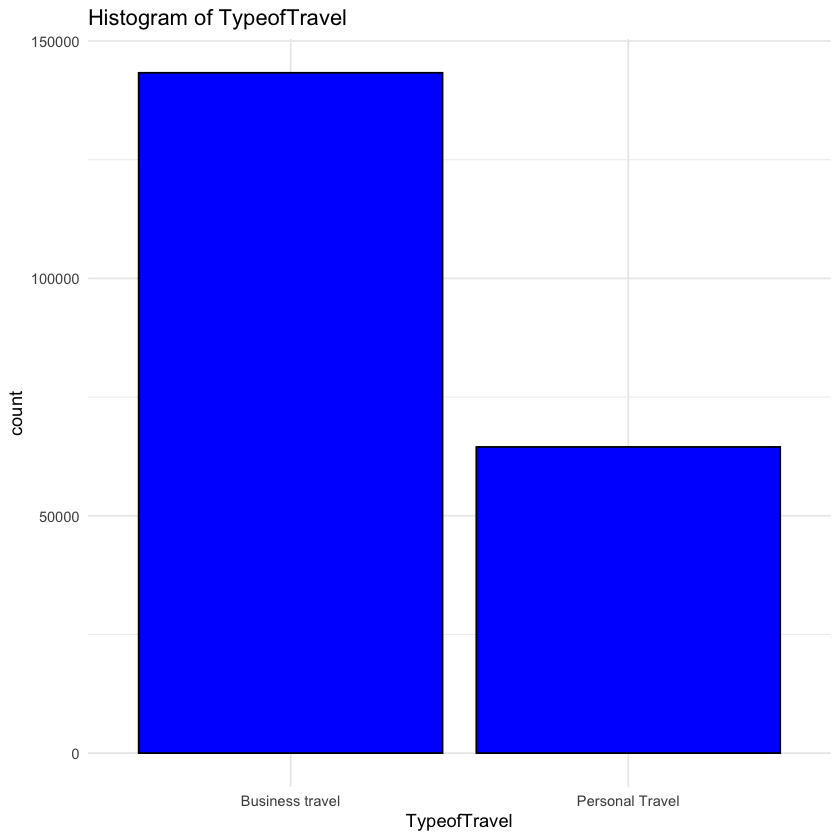


[[8]]


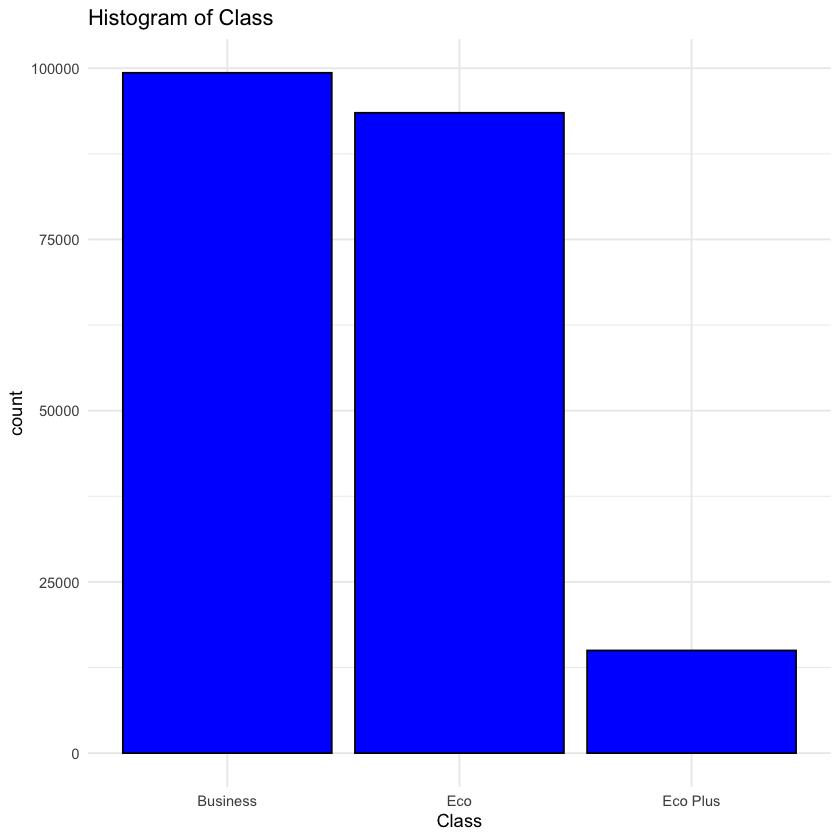


[[9]]


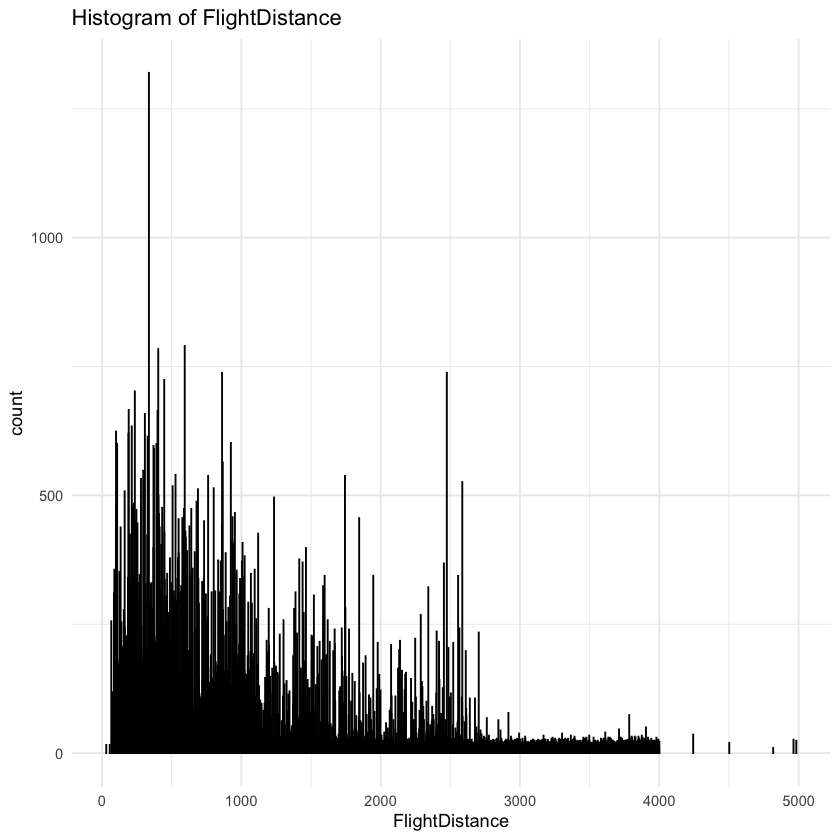


[[10]]


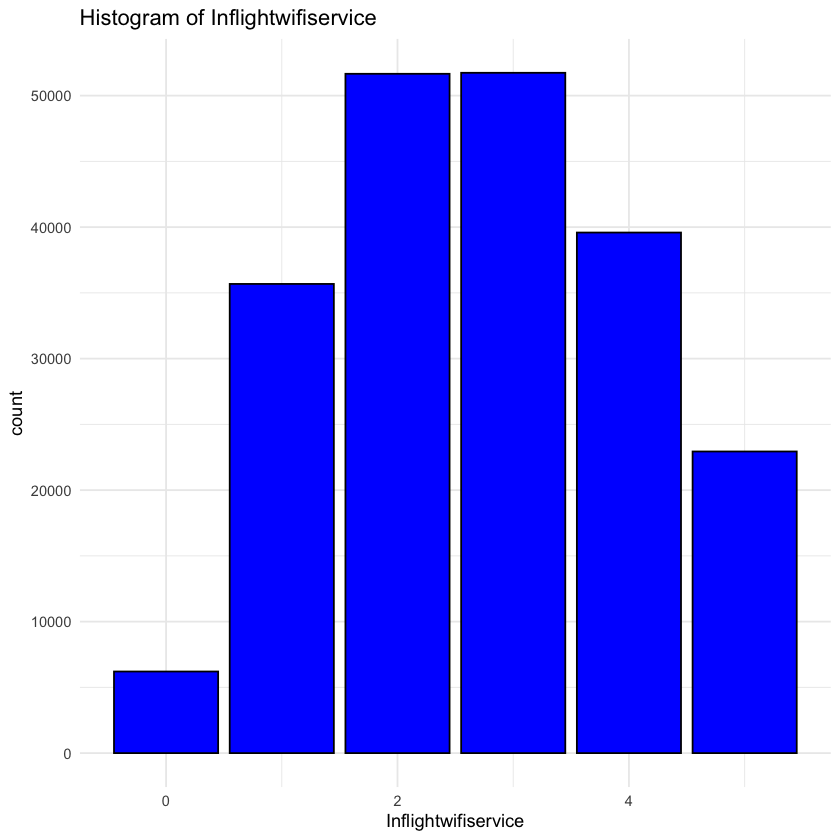


[[11]]


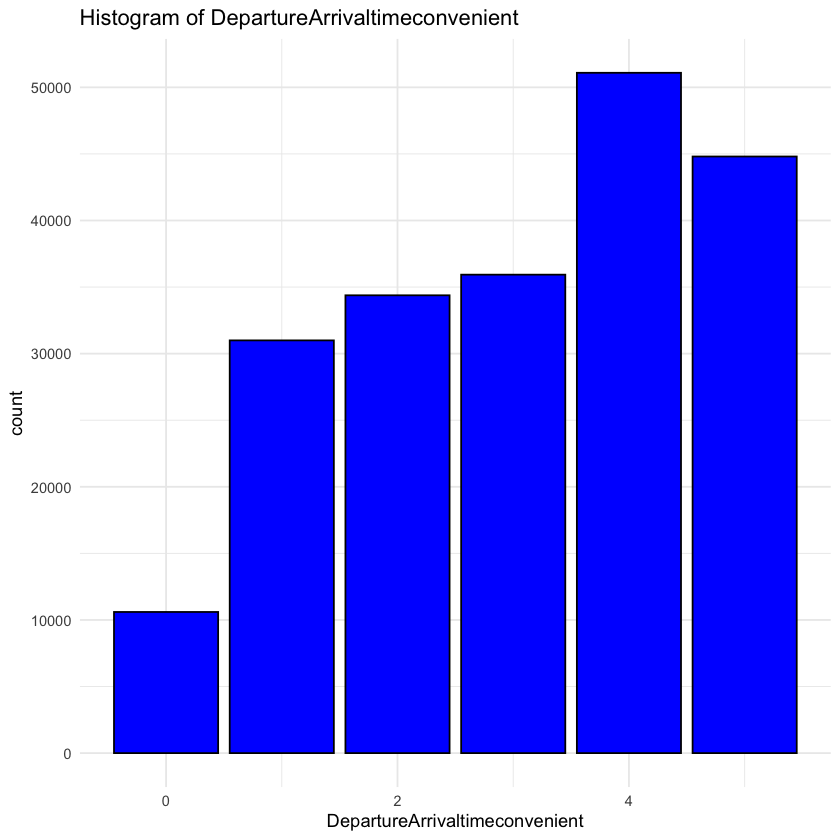


[[12]]


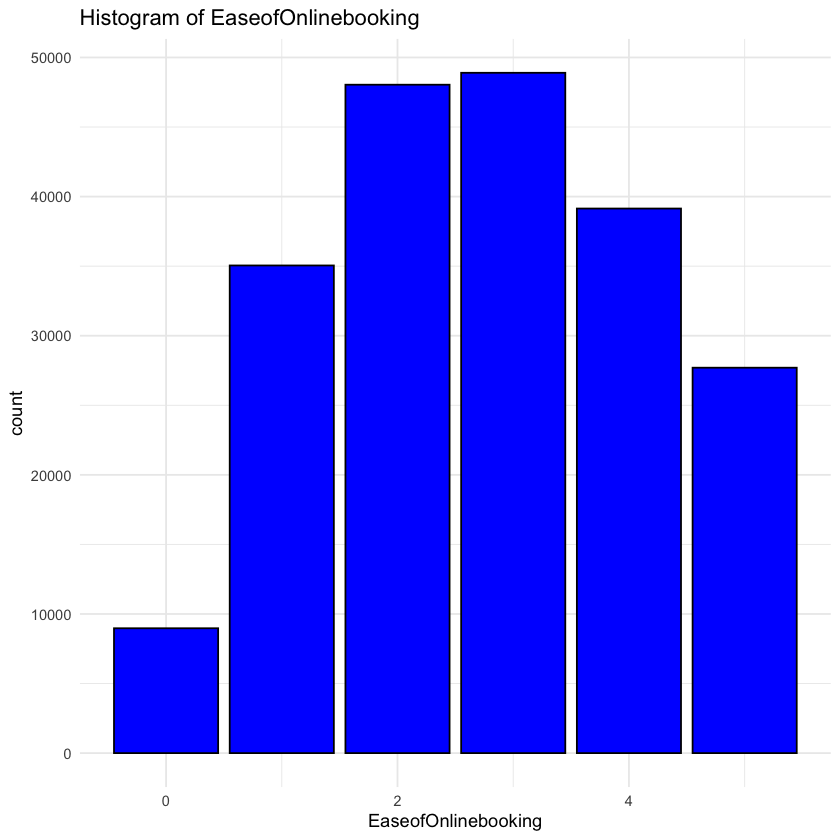


[[13]]


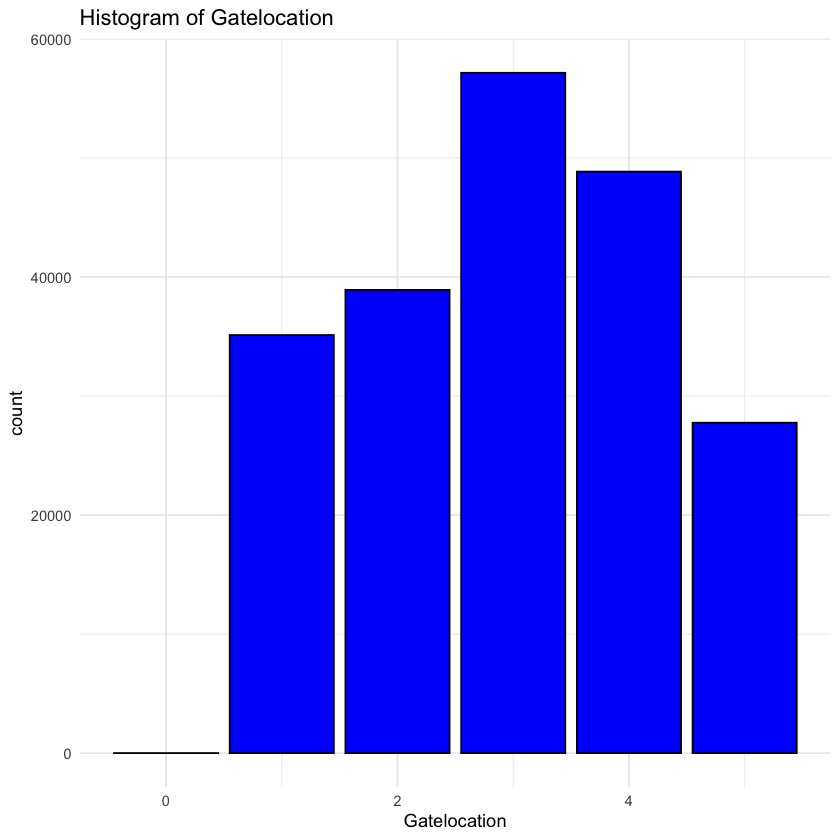


[[14]]


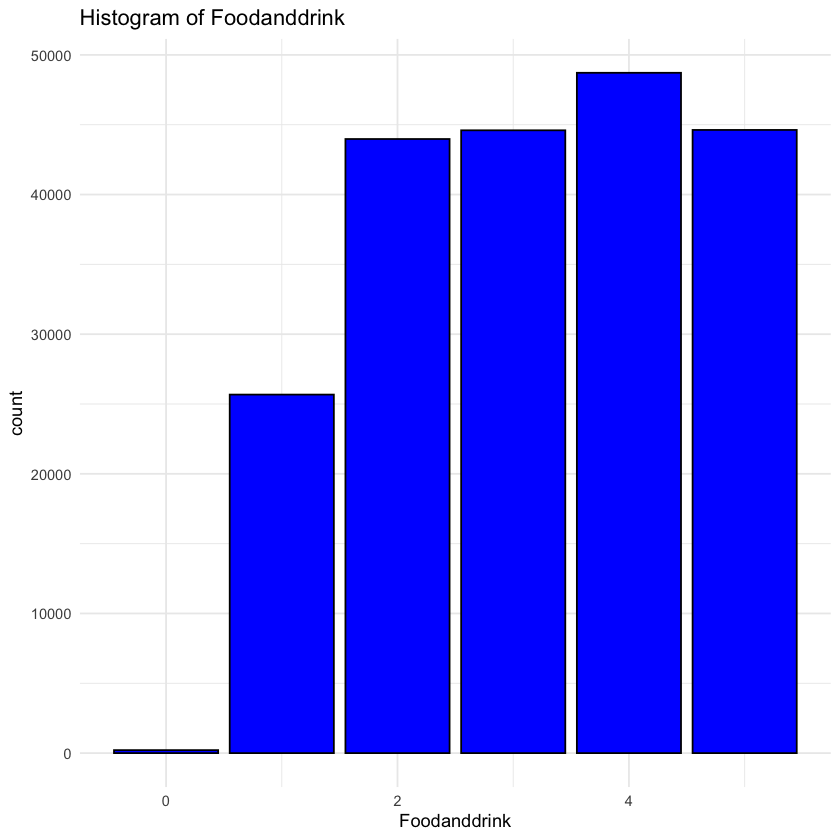


[[15]]


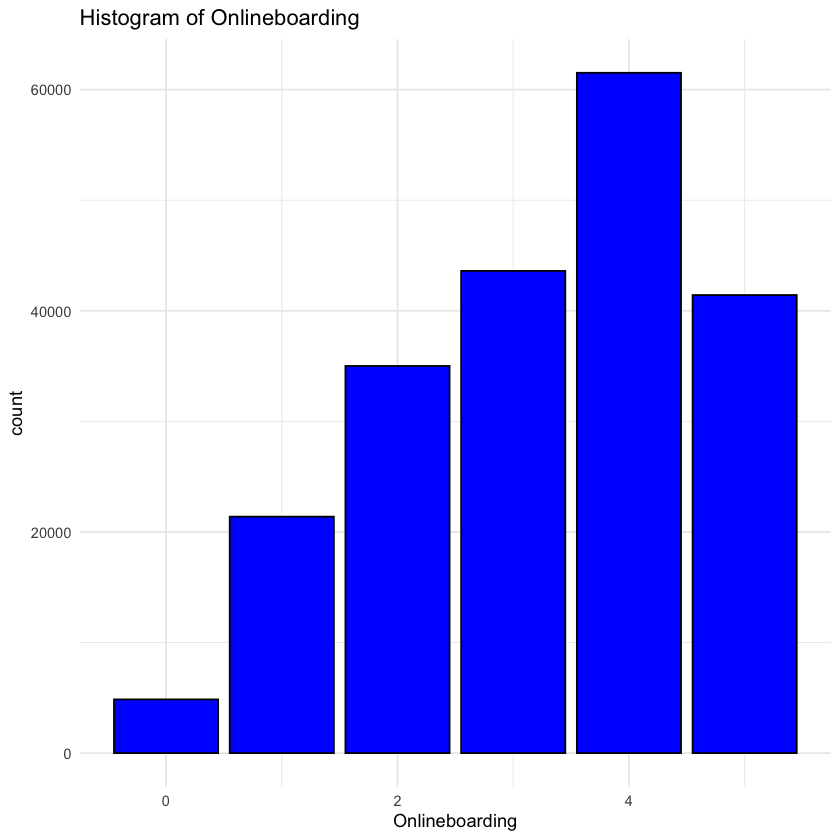


[[16]]


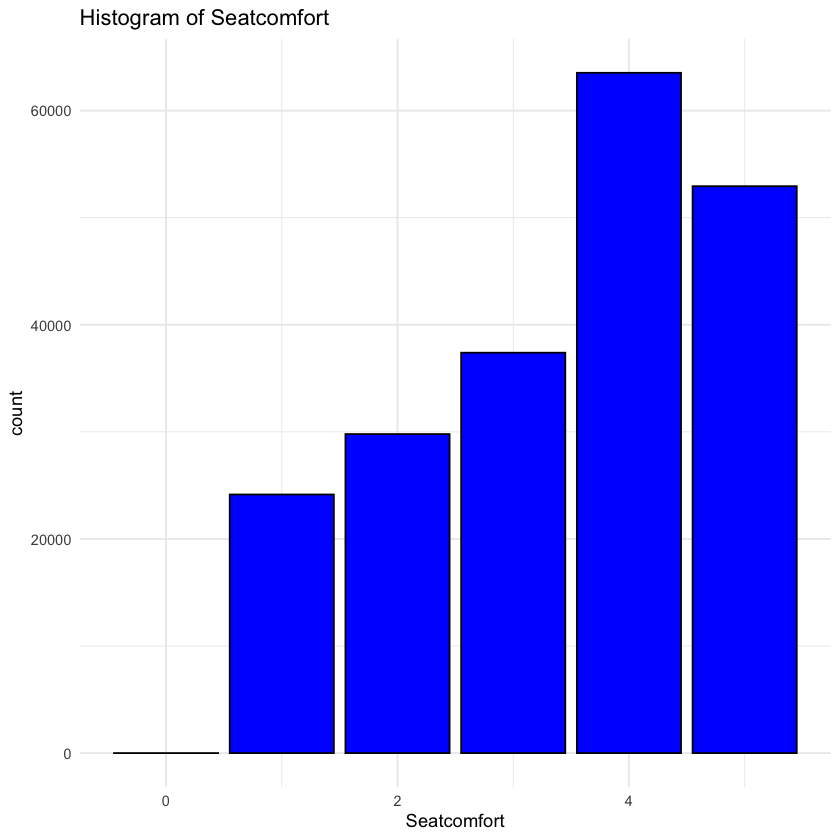


[[17]]


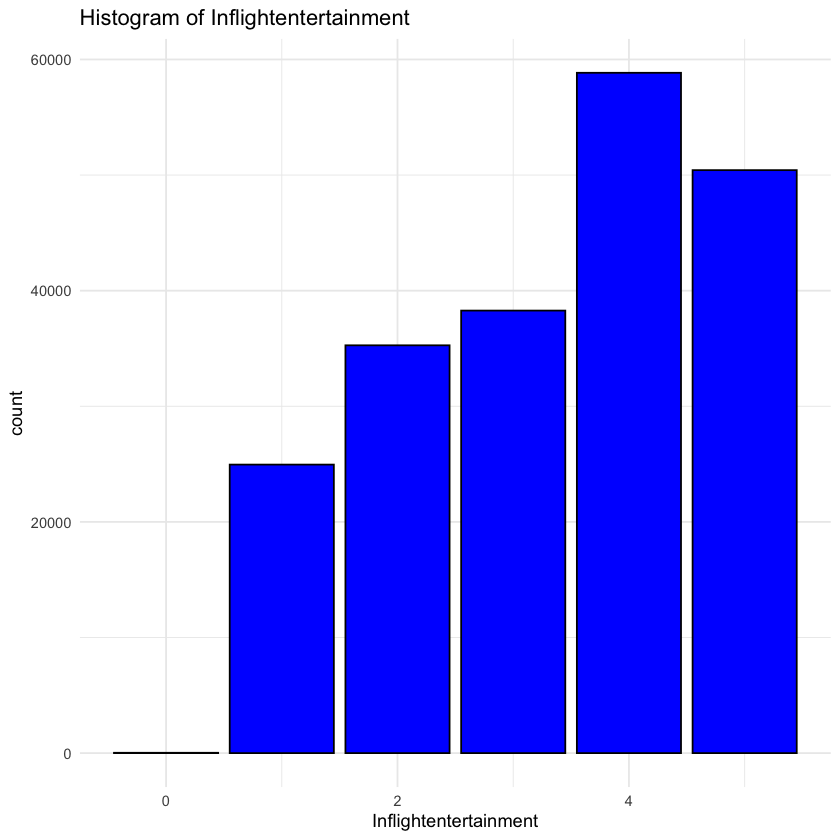


[[18]]


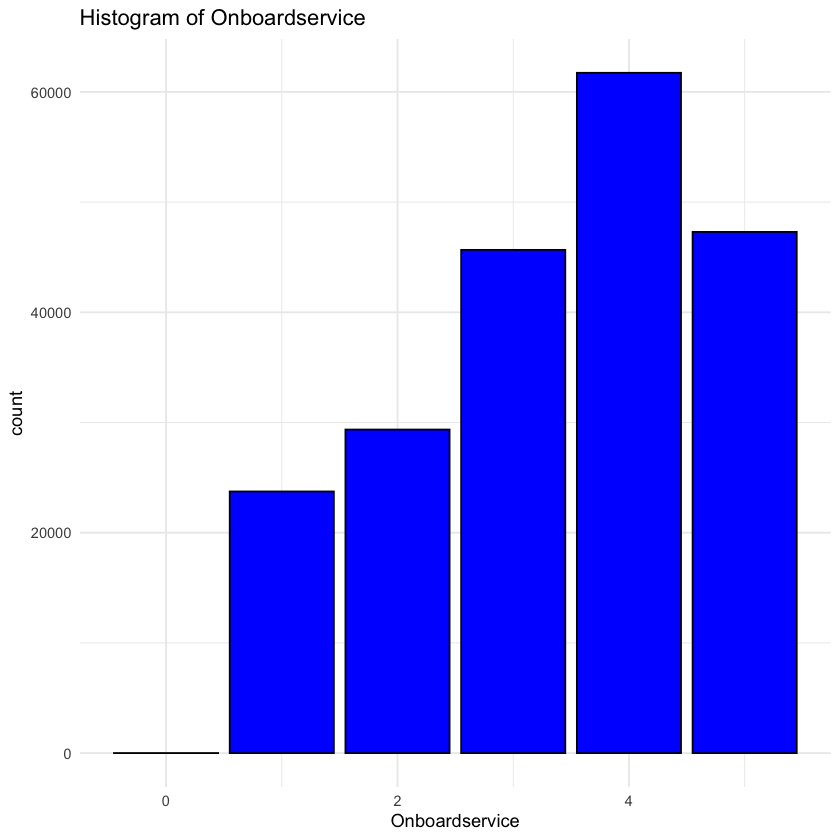


[[19]]


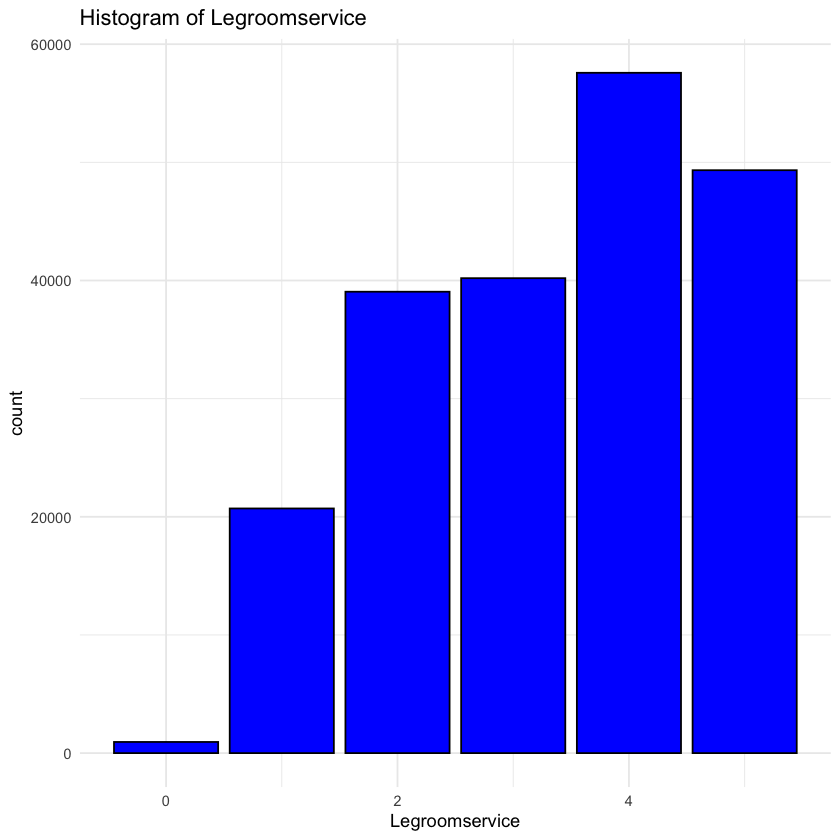


[[20]]


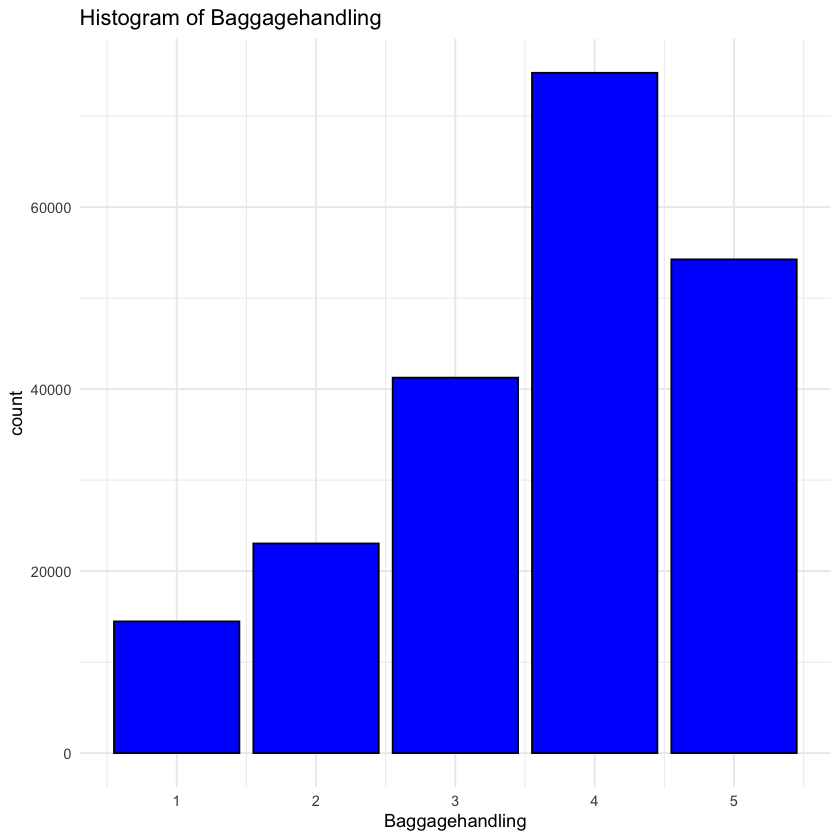


[[21]]


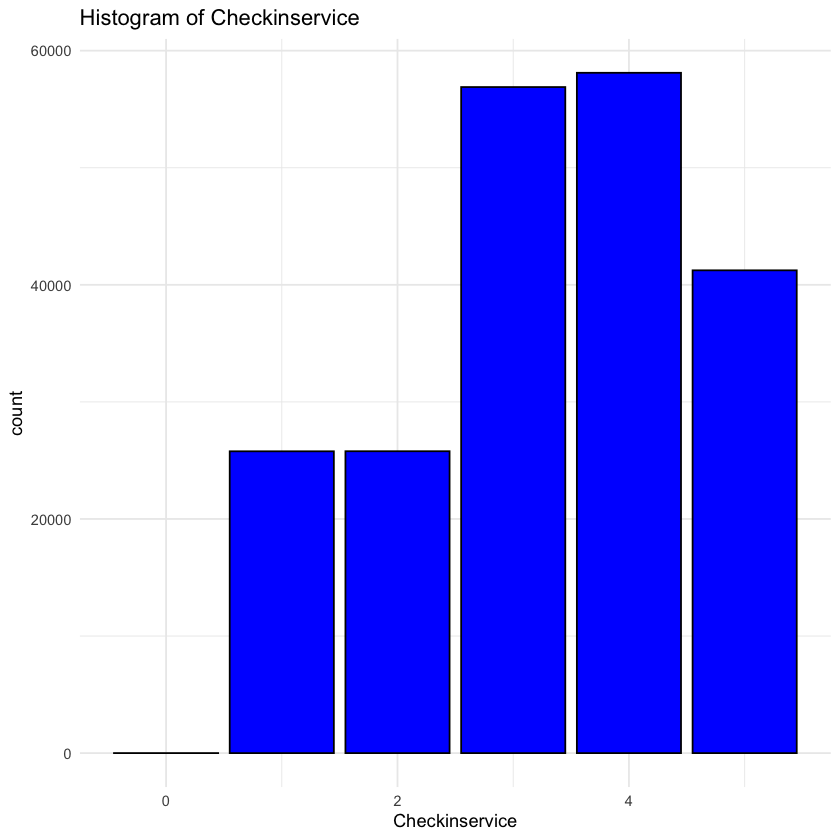


[[22]]


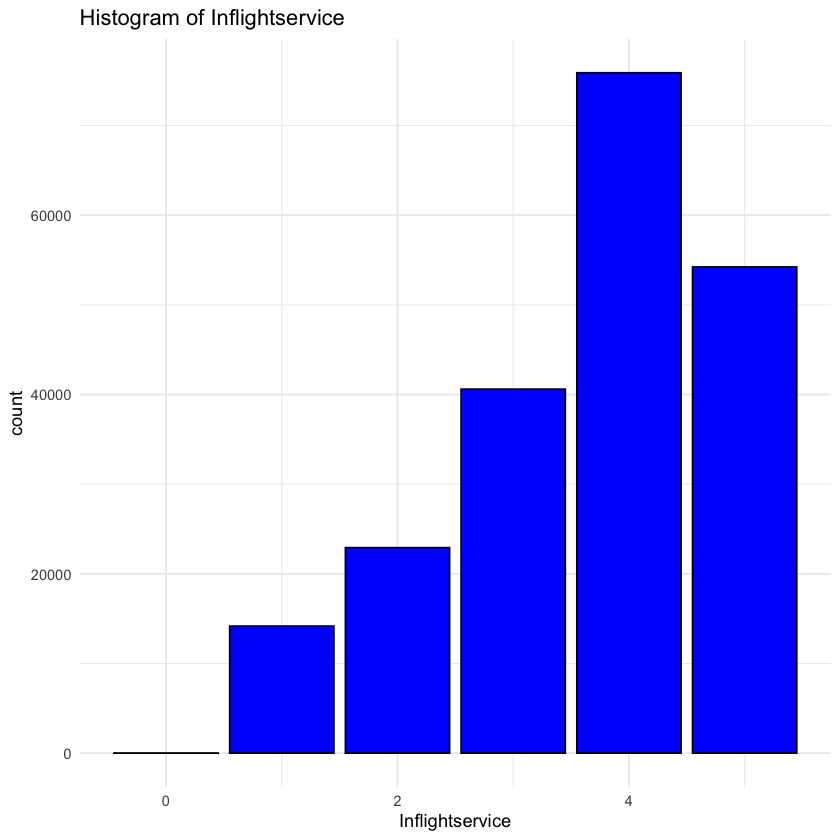


[[23]]


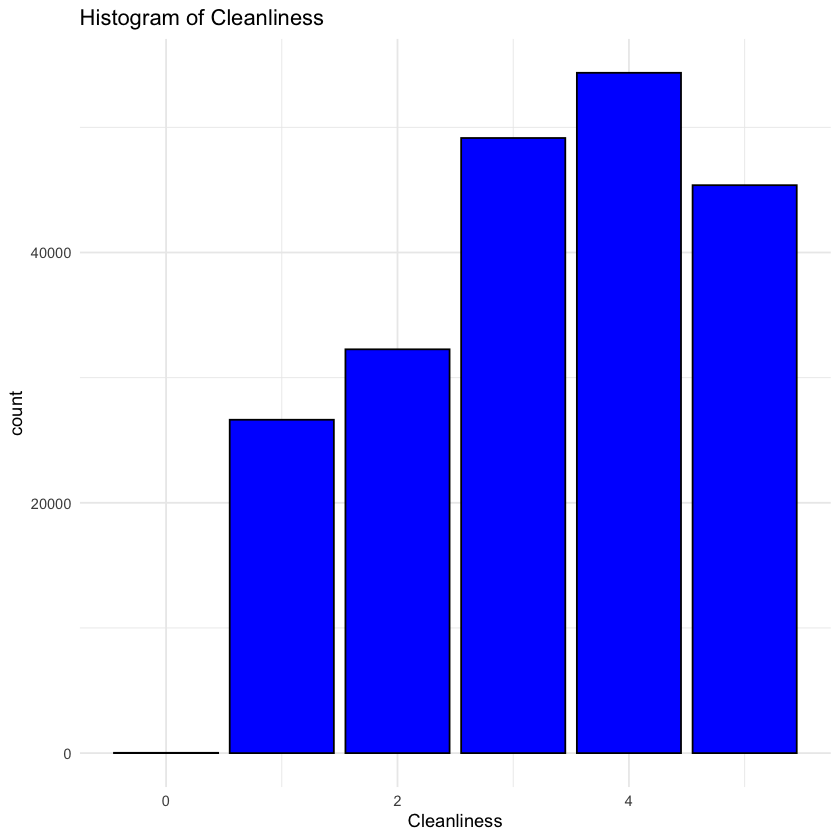


[[24]]


Warning message:
“Removed 620 rows containing non-finite values (`stat_count()`).”


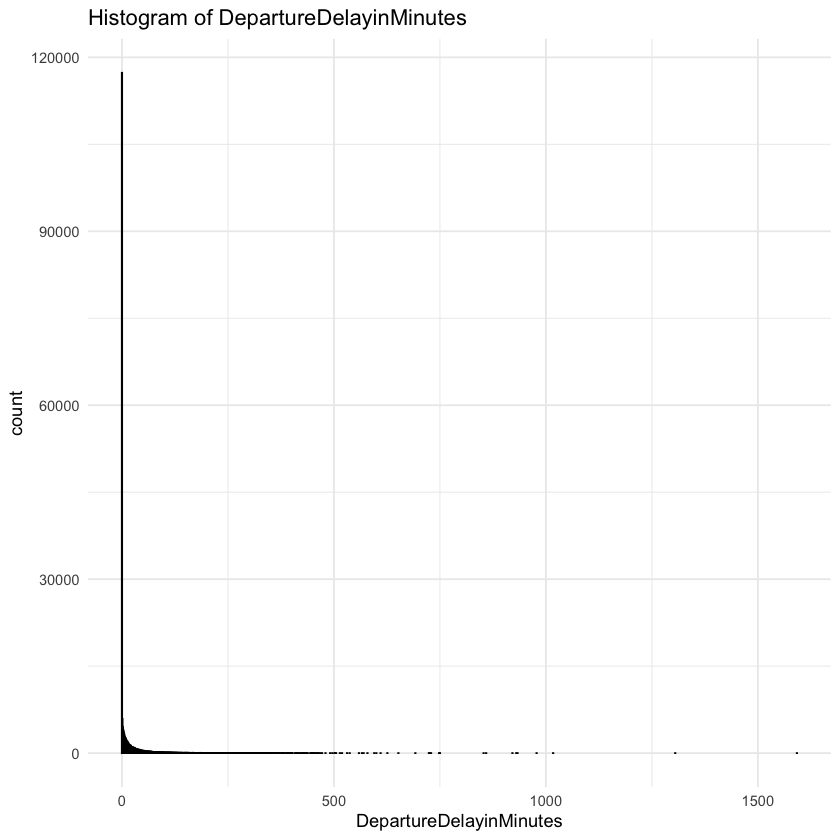


[[25]]



ERROR: Error in hclust(as.dist(1 - corr), method = hclust.method): NA/NaN/Inf in foreign function call (arg 10)


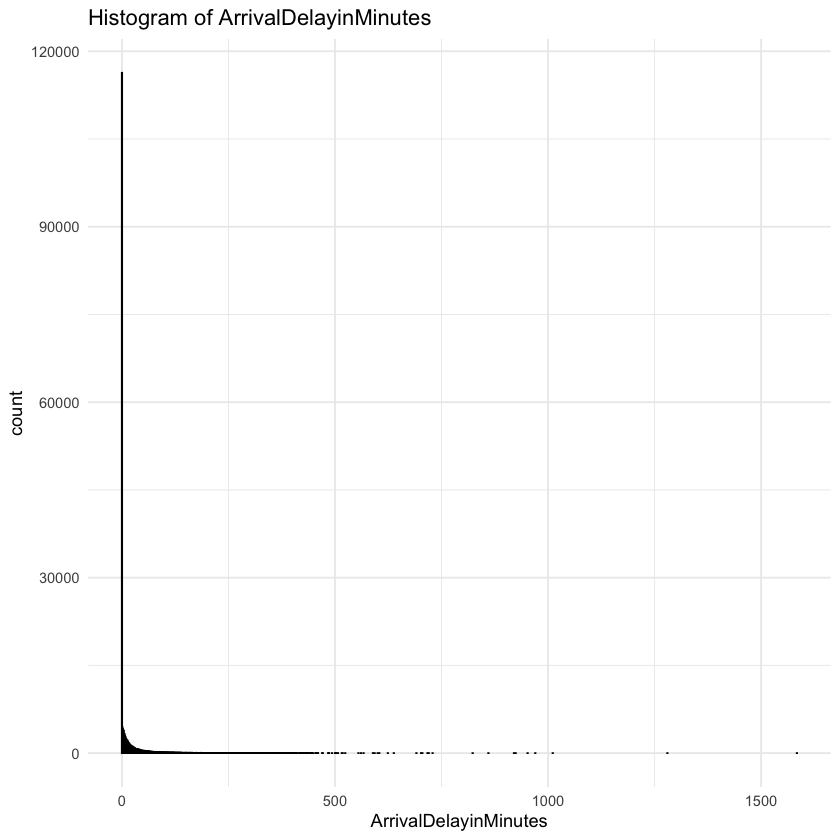

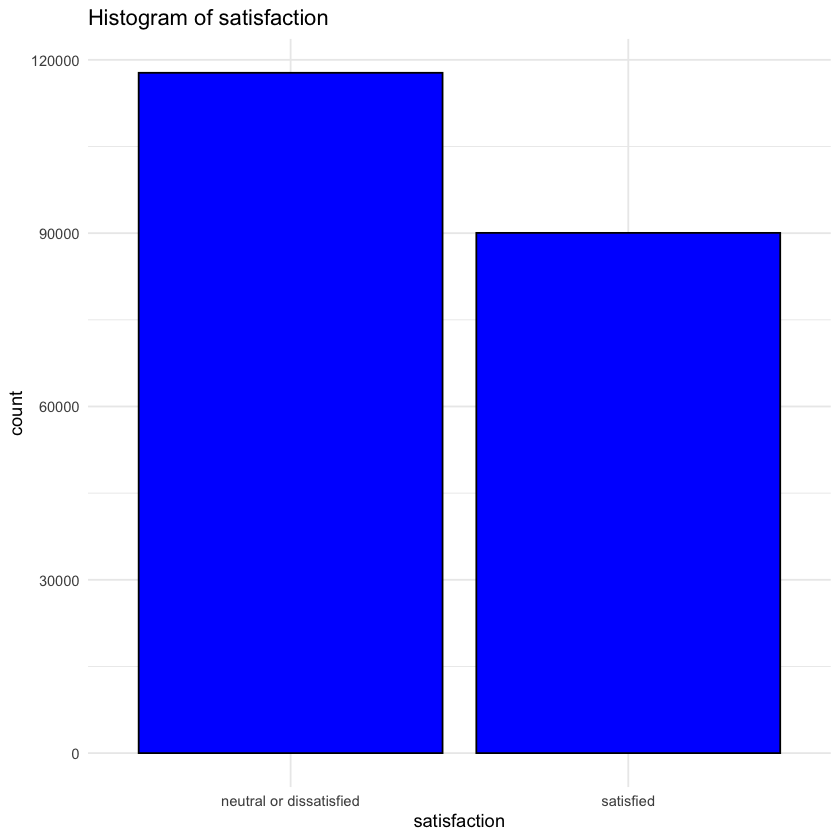

In [7]:
# clears console
cat("\014")

# Loads the libraries
MYLIBRARIES<-c("outliers",
               "caret",
               "randomForest",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "tidyr",
               "tidyverse",
               "ggplot2",
               "GGally",
               "dplyr",
               "VIM",
               "PerformanceAnalytics")
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

# load pre-processing helper functions
source("Preprocess.R")
source("lab3DataPrep.R")

# seed for reproducibility
set.seed(123)

# ************************************************
main()
print("End of EDA")